### Segmenting Captured Tree Images

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, misc, ndimage
from PIL import Image, ImageFilter
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb

In [202]:
def plot_image(image, title):
    plt.imshow(image, 'gray')
    plt.title(title, size=20)
    plt.axis('off')

c:\Users\kipli\miniconda3\envs\images2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
c:\Users\kipli\miniconda3\envs\images2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


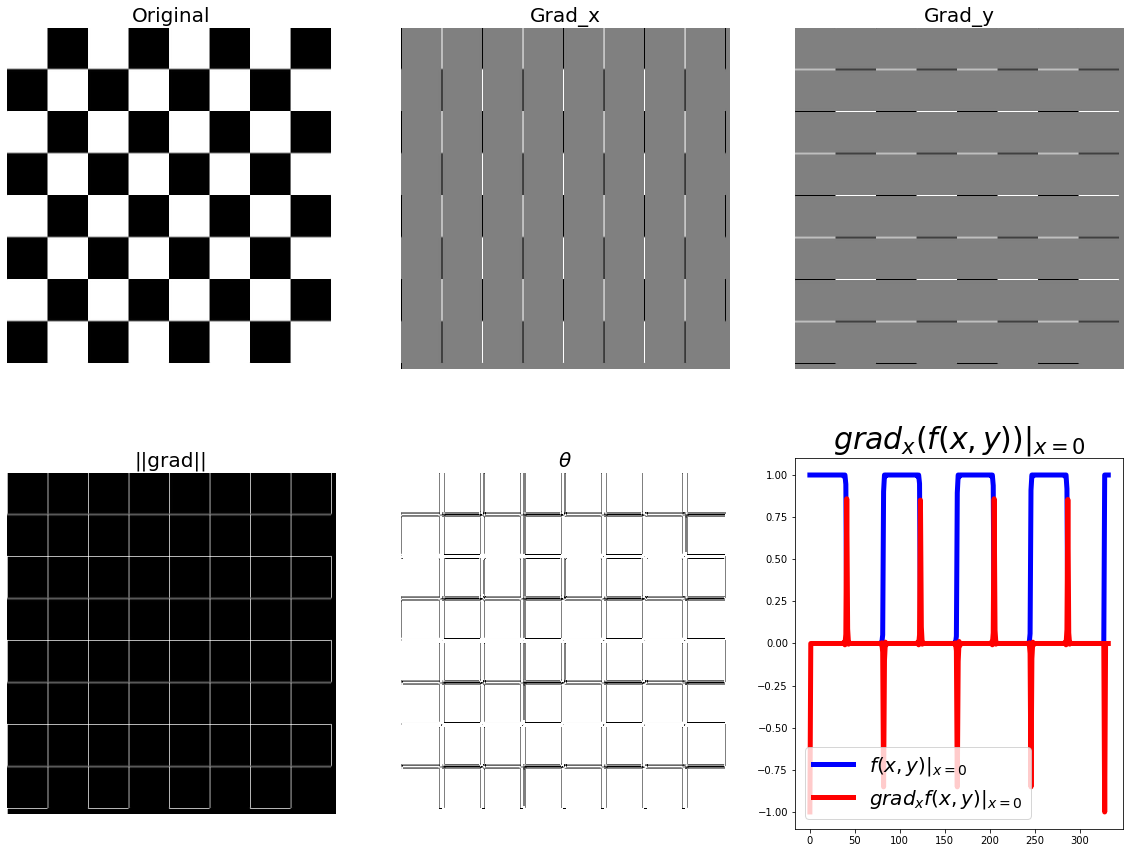

In [18]:
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread('images/packt_images/chess.png')[:,:,:3])
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y / im_x)

plt.figure(figsize=(20, 15))
plt.subplot(231), plot_image(im, 'Original')
plt.subplot(232), plot_image(im_x, 'Grad_x')
plt.subplot(233), plot_image(im_y, 'Grad_y')
plt.subplot(234), plot_image(im_mag, '||grad||')
plt.subplot(235), plot_image(im_dir, r'$\theta$')
plt.subplot(236)
plt.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y) |_{x=0}$', linewidth=5)
plt.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x f(x,y)|_{x=0}$', linewidth=5)
plt.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
plt.legend(prop={'size': 20})
plt.show()

### Sharpening with Laplacian

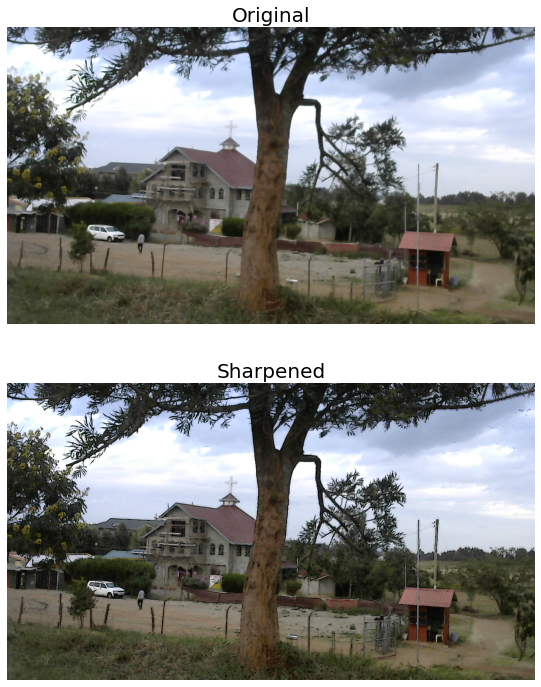

In [211]:
im = imread('trees/left_1.png')
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]


kernel1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
kernel2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
im_lap_r = signal.convolve2d(im_r, kernel2, mode='same')
im_lap_g = signal.convolve2d(im_g, kernel2, mode='same')
im_lap_b = signal.convolve2d(im_b, kernel2, mode='same')

im_lap_r[im_lap_r < 0] = 0
im_lap_g[im_lap_g < 0] = 0
im_lap_b[im_lap_b < 0] = 0

im_lap_r = im_lap_r.reshape((720, 1280))
im_lap_g = im_lap_g.reshape((720, 1280))
im_lap_b = im_lap_b.reshape((720, 1280))

sharpened_r = im_r - im_lap_r
sharpened_g = im_g - im_lap_g
sharpened_b = im_b - im_lap_b

sharpened_r[sharpened_r < 0] = 0
sharpened_g[sharpened_g < 0] = 0
sharpened_b[sharpened_b < 0] = 0

sharpened = np.dstack((sharpened_r, sharpened_g, sharpened_b))

plt.figure(figsize=(10, 12))
plt.subplot(211), plot_image(im, 'Original')
plt.subplot(212), plot_image(sharpened, 'Sharpened')
plt.show()

In [207]:
np.count_nonzero(im == sharpened)

1518905

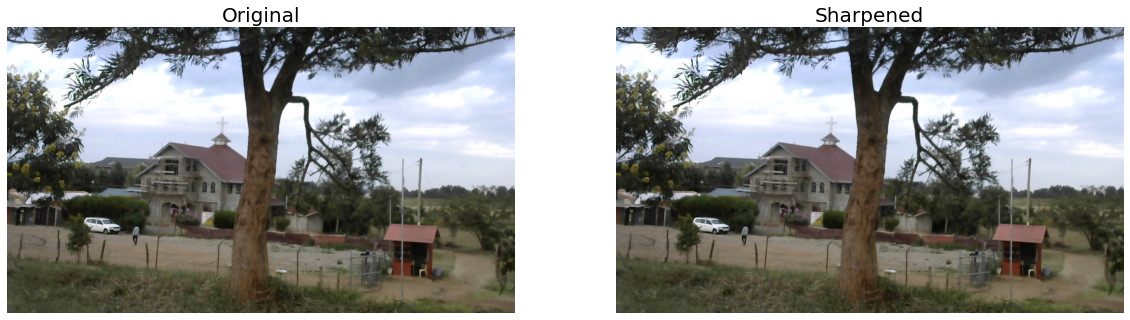

In [203]:
im = imread('trees/left_1.png')
# red gree blue
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]

# sharpening
# im_r = np.clip(ndimage.laplace(im_r) + im_r, 0, 1)
# im_g = np.clip(ndimage.laplace(im_g) + im_g, 0, 1)
# im_b = np.clip(ndimage.laplace(im_b) + im_b, 0, 1)

sharpened = np.dstack((im_r, im_g, im_b))
plt.figure(figsize=(20, 8))
plt.subplot(121), plot_image(im, 'Original')
plt.subplot(122), plot_image(sharpened, 'Sharpened')
plt.show()


2764800

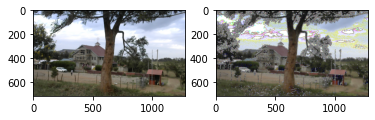

In [117]:
im_r = ndimage.laplace(im_r) + im_r
im_g = ndimage.laplace(im_g) + im_g
im_b = ndimage.laplace(im_b) + im_b

plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(np.dstack((im_r, im_g, im_b)))
plt.show()

(540, 466)


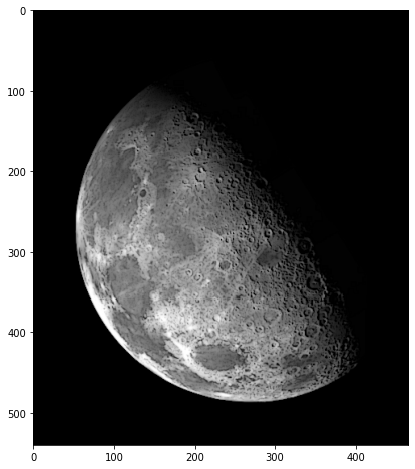

In [194]:
im = imread('DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
print(im.shape)
kernel1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
kernel2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
im_lap = signal.convolve2d(im, kernel2, mode='same')
# im_lap = ndimage.laplace(im)
im_lap[im_lap < 0] = 0
im_lap = im_lap.reshape((540, 466))
sharpened = im - im_lap
sharpened[sharpened < 0] = 0
plt.figure(figsize=(8,8))
plt.imshow(sharpened, 'gray')

In [171]:
ker

array([[ 1,  1,  1],
       [ 1, -8,  1],
       [ 1,  1,  1]])

In [ ]:
im_